In [18]:
import cv2
#import time
 
# Load the Cascade Classifier
car_cascade = cv2.CascadeClassifier("C:\\Users\\Downloads\\Deep_Learning_Test\\Moving_Car_detection_dataset\\HaarCascade_cars.xml")
 
#startt  web cam
cap = cv2.VideoCapture('C:\\Users\\Downloads\\Deep_Learning_Test\\Moving_Car_detection_dataset\\traffic.mp4')
 
while True:
     
    time.sleep(0.2)
     
    #read image from webcam
    respose, color_img = cap.read()
     
    if respose == False:
        break
     
    # Convert to grayscale
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
     
    # Detect the faces
    faces = car_cascade.detectMultiScale(gray_img, 1.1, 1)
     
    #display rectrangle
    i=0
    for (x, y, w, h) in faces:
        if i%2==0:
            cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            i +=1
        else:
            cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            i +=1      
     
        # display image
        cv2.imshow('img', color_img)
             
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

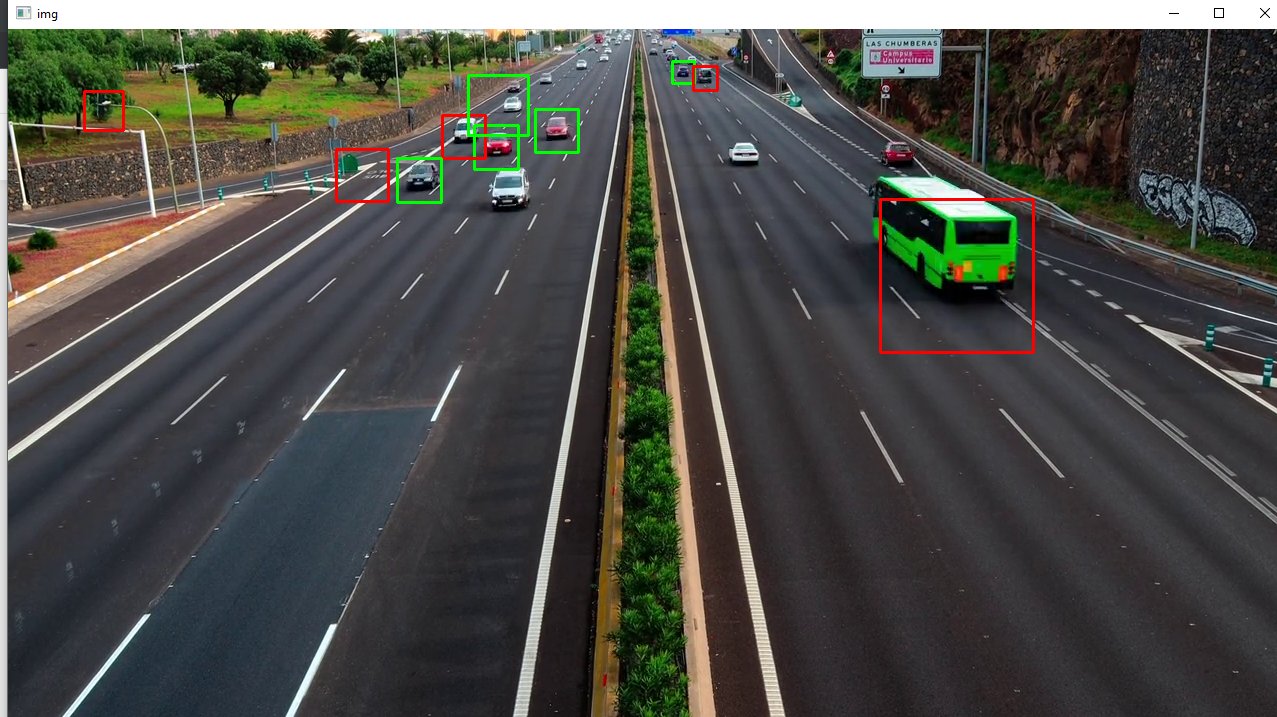

In [4]:
# Import dependencies
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read car image and convert color to RGB
carplate_img = cv2.imread('C:\\Users\\Downloads\\Deep_Learning_Test\\Moving_Car_detection_dataset\\images\\car_image.png')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

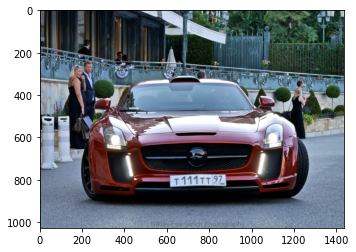

In [6]:
plt.imshow(carplate_img_rgb);

In [7]:
# Function to enlarge the plt display for user to view more clearly
def enlarge_plt_display(image, scale_factor):
    width = int(image.shape[1] * scale_factor / 100)
    height = int(image.shape[0] * scale_factor / 100)
    dim = (width, height)
    plt.figure(figsize = dim)
    plt.axis('off') 
    plt.imshow(image)

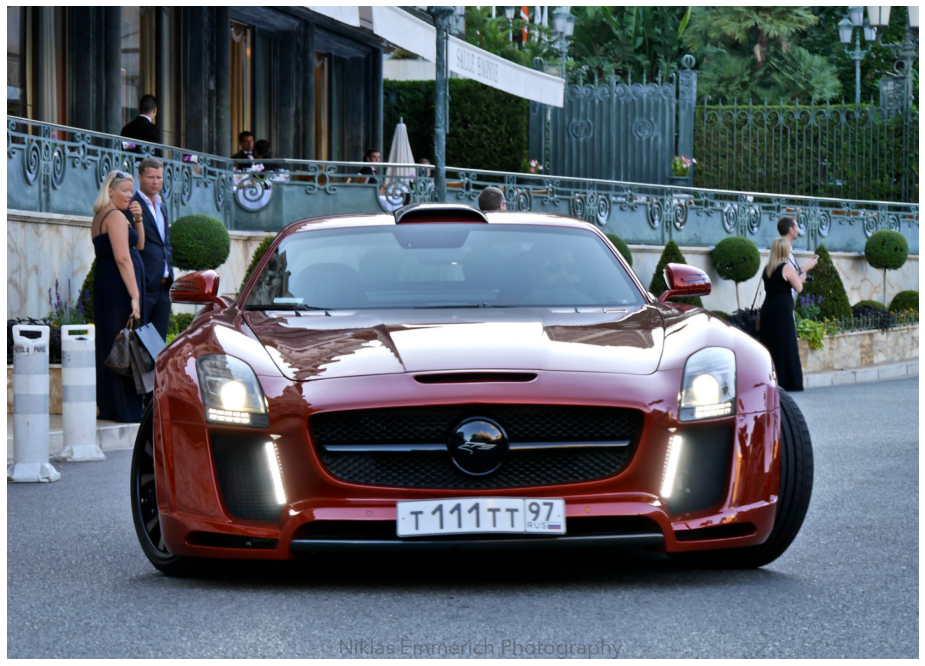

In [8]:
enlarge_plt_display(carplate_img_rgb, 1.2)

In [9]:
# Import Haar Cascade XML file for Russian car plate numbers
carplate_haar_cascade = cv2.CascadeClassifier('C:\\Users\\Srimanta\\Downloads\\Deep_Learning_Test\\Moving_Car_detection_dataset\\haarcascade_russian_plate_number.xml')

In [10]:
# Setup function to detect car plate
def carplate_detect(image):
    carplate_overlay = image.copy() # Create overlay to display red rectangle of detected car plate
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
    return carplate_overlay

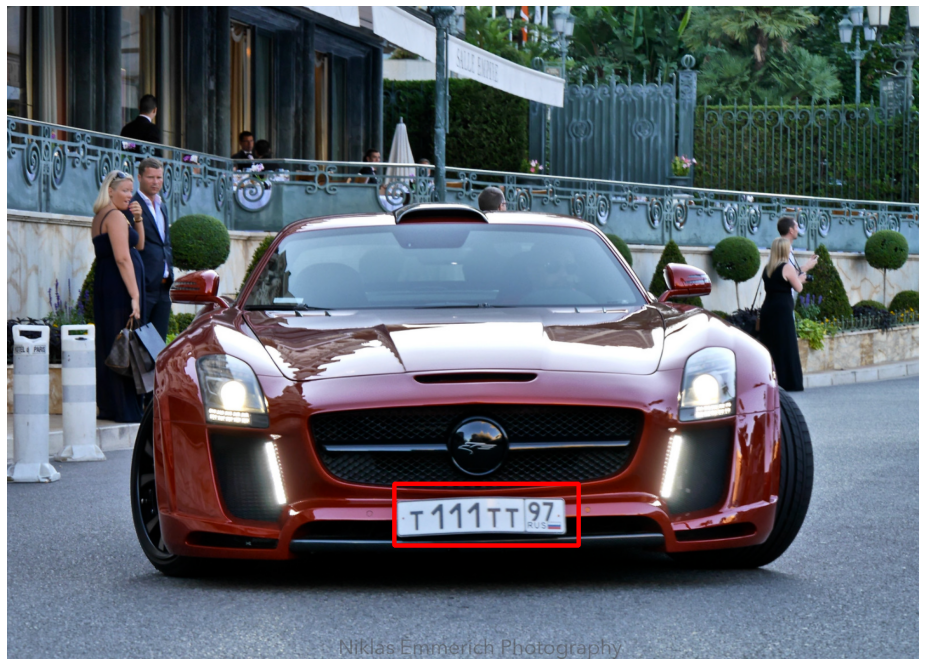

In [11]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
enlarge_plt_display(detected_carplate_img, 1.2)

In [12]:
# Function to retrieve only the car plate sub-image itself
def carplate_extract(image):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20] 
        
    return carplate_img

In [13]:
# Enlarge image for further image processing later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image


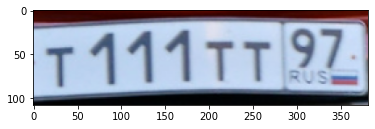

In [14]:
# Display extracted car license plate image
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img);

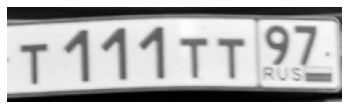

In [15]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

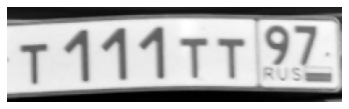

In [16]:
# Apply median blur + grayscale
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # Kernel size 3
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray');